# Big Data & Policing

**HW 3**

This Python Notebook includes solution to the Part 1 of the HW3.

Created by **Madhur Garg (20161228)**

# Part 1

**Libraries used in this notebook :**

In [1]:
import os
from PIL import Image, ExifTags
import maya
import time as t      
import datetime
from dateutil import tz
import numpy as np
import cv2
import matplotlib.pyplot as plt
import operator
from math import pi
import sys

# Question 1

In [2]:
path = "/home/madhur/bdp-2/part-1/Isis Admin's Hacked Phones"
manufacturer ={}
for root, dirs, files in os.walk(path):
    count=0        
    for name in files:
        if name.endswith(("jpeg")) and count==0:
            count+=1
            a=root
            a+="/"
            a+=name
            img = Image.open(str(a))
            try:
                exif = { ExifTags.TAGS[k]: v for k, v in img._getexif().items() if k in ExifTags.TAGS }
            except AttributeError:
                pass
            b=exif['Make']
            b=b.lower()
            b=b.strip('\x00')
            if b in manufacturer:
                manufacturer[b]+=1
            else:
                manufacturer[b]=1
print(manufacturer)

{'essential products': 1, 'mobiistar': 1, 'lg electronics': 1, 'sony': 1, 'samsung': 22}


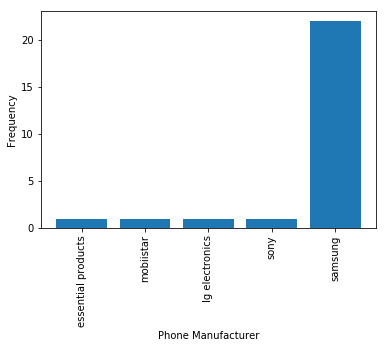

In [3]:
plt.bar(range(len(manufacturer)), list(manufacturer.values()), align='center')
plt.xticks(range(len(manufacturer)), list(manufacturer.keys()))
plt.xticks(rotation=90)
plt.xlabel('Phone Manufacturer')
plt.ylabel('Frequency')
plt.show()

**Samsung is the most common phone manufacturers among ISIS operatives**

# Question 2

In [4]:
outgoing ={}
test={}
for root, dirs, files in os.walk(path):
    for name in files:
        if name.startswith(("Calllog Dump")):
            a=root
            a+="/"
            a+= name
            file =a
            b = file.split('/')
            country=b[6]    
            index_list = []
            line_list = []
            with open(file) as f:
                for index, line in enumerate(f):
                    line_list.append(line)
                    if 'OUTGOING' in line:
                        index_list.append(index)

            for index in index_list:
                number = line_list[index-3].strip('Number	: ')
                number=number.strip('\n')
                name = line_list[index-2].strip('Name	:')
                name=name.strip('\n')
                if number in outgoing:
                    outgoing[number][1]+=1
                else:
                    outgoing[number]=[0,0,0]
                    outgoing[number][0]=name
                    outgoing[number][1]=1
                    outgoing[number][2]=country
            f.close()
for i in outgoing:
    test[str(i)]=outgoing[i][1]
test = sorted(test.items(), key=lambda kv: kv[1], reverse=True)
for i in range(5):
    number = test[i][0]
    if number in outgoing:
        print(number)
        print(outgoing[number])
#print(outgoing)

0997421993
[' هتلر', 300, 'Syria IS (Admins)']
00966550326715
[' null', 264, 'Yemen IS (Admins)']
+32486794445
[' Zawjati', 257, 'Belgium IS (Admins)']
0933637039
[' جدي ندى', 250, 'Turkey IS (Admins)']
+917780809871
[' Adal Bhat', 237, 'India IS (Admins)']


# Top 5 outgoing numbers :

1. 0997421993

Name : هتلر

Country : Syria

2. 00966550326715

Name : N/A (showing 'null' because name was not available)

Country : Yemen

3. +32486794445

Name : Zawjati

Country : Belgium

4. 0933637039

Name : جدي ندى

Country : Turkey

5. +917780809871

Name : Adal Bhat

Country : India

# Question 3

In [5]:
incoming ={}
test={}
for root, dirs, files in os.walk(path):
    for name in files:
        if name.startswith(("Calllog Dump")):
            a=root
            a+="/"
            a+=name
            file =a
            b = file.split('/')
            country=b[6]    
            index_list = []
            line_list = []
            with open(file) as f:
                for index, line in enumerate(f):
                    line_list.append(line)
                    if 'INCOMING' in line:
                        index_list.append(index)

            for index in index_list:
                number = line_list[index-3].strip('Number	: ')
                number=number.strip('\n')
                name = line_list[index-2].strip('Name	:')
                name=name.strip('\n')
                if number in incoming:
                    incoming[number][1]+=1
                else:
                    incoming[number]=[0,0,0]
                    incoming[number][0]=name
                    incoming[number][1]=1
                    incoming[number][2]=country
            f.close()
for i in incoming:
    test[str(i)]=incoming[i][1]
test = sorted(test.items(), key=lambda kv: kv[1], reverse=True)
for i in range(5):
    number = test[i][0]
    if number in incoming:
        print(number)
        print(incoming[number])

Syriatel
[' null', 622, 'Syria IS (Admins)']
MTN
[' null', 363, 'Syria IS (Admins)']
+963997421993
[' هتلر', 222, 'Syria IS (Admins)']
+917780848045
[' Musaib Dhurani', 160, 'India IS (Admins)']
Abili
[' null', 110, 'Syria IS (Admins)']


# Top 5 incoming numbers :

1. Syriatel

Name : N/A (showing 'null' because name was not available)

Country : Syria

2. MTN

Name : N/A (showing 'null' because name was not available)

Country : Syria

3. +963997421993

Name : هتلر

Country : Syria

4. +917780848045

Name : Musaib Dhurani

Country : India

5. Abili

Name : N/A (showing 'null' because name was not available)

Country : Syria

# Question 4

{'Syria IS (Admins)': 5353, 'Yemen IS (Admins)': 2042, 'India IS (Admins)': 3999}


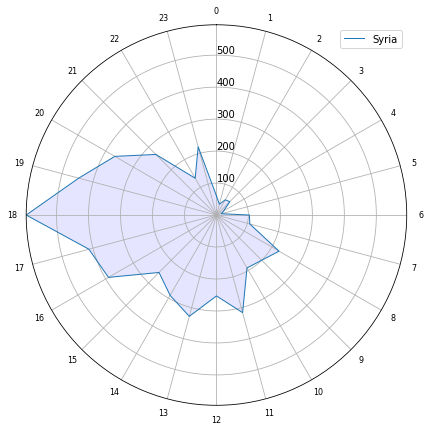

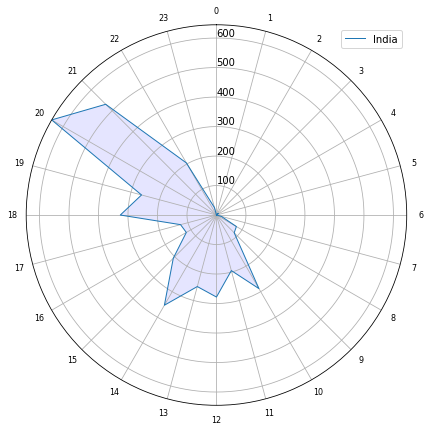

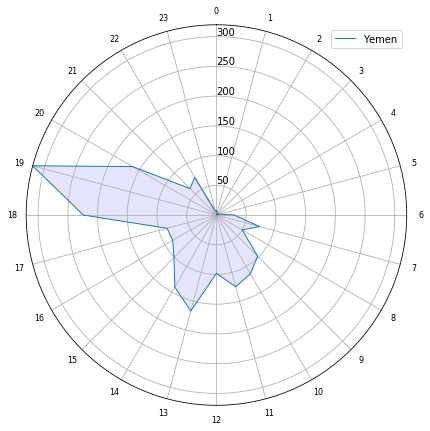

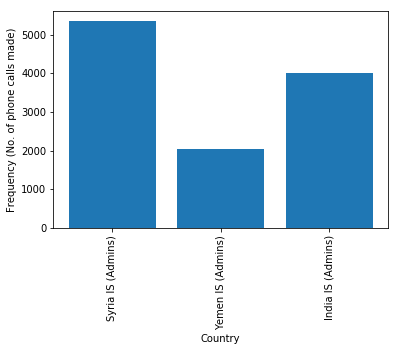

In [19]:
frequency ={}
yemen={}
yemen_timing={}
india={}
india_timing={}
syria={}
syria_timing={}
for root, dirs, files in os.walk(path):
    for name in files:
        if name.startswith(("Calllog Dump")):
            a=root
            a+="/"
            a+=name
            file =a
            index_list = []
            line_list = []
            with open(file) as f:
                for index, line in enumerate(f):
                    line_list.append(line)
                    if 'Type' in line and "Yemen IS (Admins)" in a:
                        index_list.append(index)
                        if "Yemen IS (Admins)" in frequency:
                            frequency["Yemen IS (Admins)"]+=1
                        else:
                            frequency["Yemen IS (Admins)"]=1
                        if line_list[index-1].startswith(("Date")):
                                date = line_list[index-1].strip('Date	: ')
                                date = date.strip('\n')
                                date = date.split(" ")
                                timezone = date[4]
                                time = date[3]
                                dt = maya.parse(time).datetime(to_timezone='UTC', naive=False)  
                                dt=dt.time()
                                if dt in yemen:
                                    yemen[dt]+=1
                                else:
                                    yemen[dt]=1

                    if 'Type' in line and "India IS (Admins)" in a:
                        index_list.append(index)
                        if "India IS (Admins)" in frequency:
                            frequency["India IS (Admins)"]+=1
                        else:
                            frequency["India IS (Admins)"]=1
                        if line_list[index-1].startswith(("Date")):
                                date = line_list[index-1].strip('Date	: ')
                                date = date.strip('\n')
                                date = date.split(" ")
                                timezone = date[4]
                                time = date[3]
                                dt = maya.parse(time).datetime(to_timezone='UTC', naive=False)  
                                dt = dt.time()
                                if dt in india:
                                    india[dt]+=1
                                else:
                                    india[dt]=1

                    if 'Type' in line and "Syria IS (Admins)" in a:
                        index_list.append(index)
                        if "Syria IS (Admins)" in frequency:
                            frequency["Syria IS (Admins)"]+=1
                        else:
                            frequency["Syria IS (Admins)"]=1             
                        if line_list[index-1].startswith(("Date")):
                                date = line_list[index-1].strip('Date	: ')
                                date = date.strip('\n')
                                date = date.split(" ")
                                timezone = date[4]
                                time = date[3]
                                dt = maya.parse(time).datetime(to_timezone='UTC', naive=False)  
                                dt = dt.time()
                                if dt in syria:
                                    syria[dt]+=1
                                else:
                                    syria[dt]=1
            f.close()

print(frequency)
#print(india)

for i in india:
    for j in range(24):
        start = datetime.time(j, 0, 0)
        end = datetime.time(j, 59, 59)
        if i>=start and i<=end:
            #start=str(start)
            if j in india_timing:
                india_timing[j]+=india[i]
            else:
                india_timing[j]=india[i]

for i in range(24):
    if i not in india_timing:
        india_timing[i]=0
india_timing = dict(sorted(india_timing.items(), key=operator.itemgetter(0)))
for i in syria:
    for j in range(24):
        start = datetime.time(j, 0, 0)
        end = datetime.time(j, 59, 59)
        if i>=start and i<=end:
            #start=str(start)
            if j in syria_timing:
                syria_timing[j]+=syria[i]
            else:
                syria_timing[j]=syria[i]
                
for i in range(24):
    if i not in syria_timing:
        syria_timing[i]=0
syria_timing = dict(sorted(syria_timing.items(), key=operator.itemgetter(0)))
#print(syria_timing)

for i in yemen:
    for j in range(24):
        start = datetime.time(j, 0, 0)
        end = datetime.time(j, 59, 59)
        if i>=start and i<=end:
            #start=str(start)
            if j in yemen_timing:
                yemen_timing[j]+=yemen[i]
            else:
                yemen_timing[j]=yemen[i]
                
for i in range(24):
    if i not in yemen_timing:
        yemen_timing[i]=0
yemen_timing = dict(sorted(yemen_timing.items(), key=operator.itemgetter(0)))
#print(yemen_timing)
a=[syria_timing,india_timing,yemen_timing]
b=['Syria','India','Yemen']
for i in a:
    plt.figure(figsize=(7,7))
    cat = list(i.keys())
    values = list(i.values())
    N = len(cat)
    x_as = [n / float(N) * 2 * pi for n in range(N)]
    values += values[:1]
    x_as += x_as[:1]

    ax = plt.subplot(111, polar=True)

    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)

    ax.set_rlabel_position(0)
    plt.ylim(0, max(values))

    plt.xticks(x_as[:-1],cat, color='black', size=8)
    ax.plot(x_as, values, linewidth=1, linestyle='solid')
    ax.fill(x_as, values, 'b', alpha=0.1)
    c=a.index(i)
    ax.legend([b[c]])
    plt.show()
    
plt.bar(range(len(frequency)), list(frequency.values()), align='center')
plt.xticks(range(len(frequency)), list(frequency.keys()))
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel('Frequency (No. of phone calls made)')
plt.show()


**Syria has the highest frequency of calls.**

**There is a slight difference in calling patterns of the three countries**

**In SYRIA peak calling hours are 1700 to 2000 hrs (UTC), in INDIA peak calling hours are 1900 to 2100 hrs (UTC) while in YEMEN peak calling hours are 1800 to 2000 hrs (UTC)**

# Question 5

In [7]:
callduration = {}
callaverage = {}
noofcalls = {}
for root, dirs, files in os.walk(path):
    for name in files:
        if name.startswith(("Calllog Dump")):
            a=root
            a+="/"
            a+= name
            file =a
            b = file.split('/')
            country=b[6]
            with open(file) as f:
                for line in f:
                    if 'Duration' in line:
                        duration = line.strip('Duration: ')
                        duration = int(duration)
                        if country in callduration:
                            callduration[country][0]+=duration
                            callduration[country][1]+=1
                        else:
                            callduration[country]=[0,0]
                            callduration[country][0]=duration
                            callduration[country][1]=1


            f.close()
for i in callduration:
    b = i.split('(')
    b = b[0]
    noofcalls[b]= int(callduration[i][1])
    callaverage[b]= int(int(callduration[i][0])/int(callduration[i][1]))
print(callaverage)
print(noofcalls)

{'Australlia IS ': 56, 'IS Using VPN ': 20, 'Libya IS ': 48, 'Syria IS ': 15, 'Turkey IS ': 3, 'Ghana IS ': 36, 'Morocco IS ': 26, 'Palestine IS ': 8, 'Algeria ': 25, 'Yemen IS ': 30, 'India IS ': 145, 'Republic of Moldova IS ': 0, 'Belgium IS ': 44}
{'Australlia IS ': 916, 'IS Using VPN ': 1, 'Libya IS ': 1151, 'Syria IS ': 5353, 'Turkey IS ': 440, 'Ghana IS ': 50, 'Morocco IS ': 204, 'Palestine IS ': 18, 'Algeria ': 669, 'Yemen IS ': 2042, 'India IS ': 3999, 'Republic of Moldova IS ': 2, 'Belgium IS ': 1500}


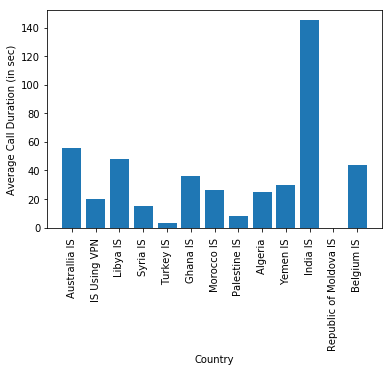

In [8]:
plt.bar(range(len(callaverage)), list(callaverage.values()), align='center')
plt.xticks(range(len(callaverage)), list(callaverage.keys()))
plt.xticks(rotation=90)
plt.ylabel('Average Call Duration (in sec)')
plt.xlabel('Country')
plt.show()

**INDIA has the highest average of call duration**

**REPUBLIC OF MOLDOVA has lowest average of 0 seconds**


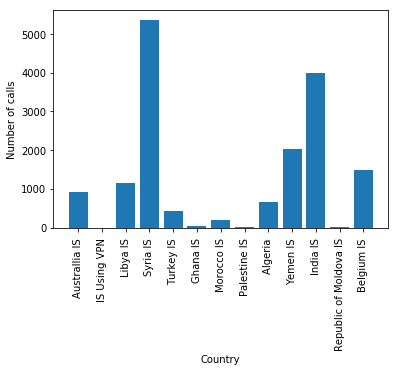

In [9]:
plt.bar(range(len(noofcalls)), list(noofcalls.values()), align='center')
plt.xticks(range(len(noofcalls)), list(noofcalls.keys()))
plt.xticks(rotation=90)
plt.ylabel('Number of calls')
plt.xlabel('Country')
plt.show()

**SYRIA has highest number of calls**

**IS USING VPN has lowest number of calls**

**One thing can be inferred that average call duration and number of calls are not related to each other**

# Question 6

[("/home/madhur/bdp-2/part-1/Isis Admin's Hacked Phones/India IS (Admins)/IS1/Front Camera Snapshots", 130), ("/home/madhur/bdp-2/part-1/Isis Admin's Hacked Phones/Syria IS (Admins)/IS3/Front Camera Snapshots", 48), ("/home/madhur/bdp-2/part-1/Isis Admin's Hacked Phones/Yemen IS (Admins)/IS6/Front Camera Snapshots", 37), ("/home/madhur/bdp-2/part-1/Isis Admin's Hacked Phones/Belgium IS (Admins)/IS1/Front Camera Snapshots", 25), ("/home/madhur/bdp-2/part-1/Isis Admin's Hacked Phones/Yemen IS (Admins)/IS2/Front Camera Snapshots", 20), ("/home/madhur/bdp-2/part-1/Isis Admin's Hacked Phones/IS Using VPN (Admins)/IS2/Front Camera Snapshots", 7), ("/home/madhur/bdp-2/part-1/Isis Admin's Hacked Phones/Syria IS (Admins)/IS6/Front Camera Snapshots", 5), ("/home/madhur/bdp-2/part-1/Isis Admin's Hacked Phones/Ghana IS (Admins)/IS1/Front Camera Snapshots", 4), ("/home/madhur/bdp-2/part-1/Isis Admin's Hacked Phones/Yemen IS (Admins)/IS4/Front Camera Snapshots", 3), ("/home/madhur/bdp-2/part-1/Isis 

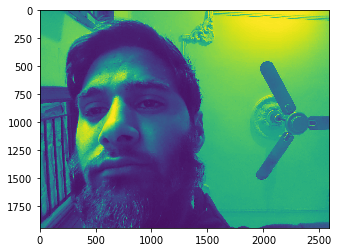

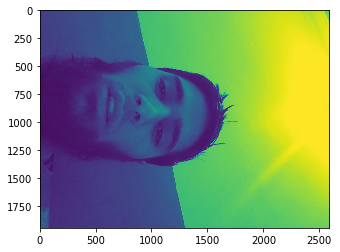

In [10]:
face_cascade = cv2.CascadeClassifier('/usr/share/opencv/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('/us/share/opencv/haarcascades/haarcascade_eye.xml')
frequency={}
for root, dirs, files in os.walk(path):
    for name in files:
        if name.endswith(("g")):
            a=root
            a+="/"
            a+= name
            file =a
            img = cv2.imread(a)
            gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            b = file.split('/')
            country=b[6]
            face = face_cascade.detectMultiScale(gray, 1.3, 5)
            print(face)
            face = str(face)
            if face in frequency:
                frequency[face][0]+=1
            else:
                frequency[face]=[0,0,0]
                frequency[face][0]=1
                frequency[face][1]=country
                frequency[face][2]=a
            cv2.waitKey(0)
            cv2.destroyAllWindows()

isis={}
for root, dirs, files in os.walk(path):
    count=0
    if 'Front Camera Snapshots' in root and 'dump' not in root:
        for name in files:
            if name.endswith(("jpeg")):
                count+=1
        isis[root]=count

isis = sorted(isis.items(), key=operator.itemgetter(1), reverse =True)
print(isis)
path2="/home/madhur/bdp-2/part-1/Isis Admin's Hacked Phones/India IS (Admins)/IS1/Front Camera Snapshots"
for root, dirs, files in os.walk(path2):
    count=0
    for name in files:
        if name.endswith(("g")):
            a=root
            a+='/'
            a+=name
            img = cv2.imread(a)
            gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            faces = face_cascade.detectMultiScale(gray, 1.3, 5)
            #print(faces)
            for (x,y,w,h) in faces:
                cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
                roi_gray = gray[y:y+h, x:x+w]
                roi_color = img[y:y+h, x:x+w]
            m=0
            if len(faces) is not m:
                count+=1
            if count==1:
                #cv2.imshow('img',img)    
                plt.imshow(gray)
                plt.show()
                cv2.waitKey(0)
                cv2.destroyAllWindows()
                try:
                    sys.exit()
                except SystemExit:
                    pass

**INDIA's IS1 operative's face comes most number of times**